Training...

...ready!


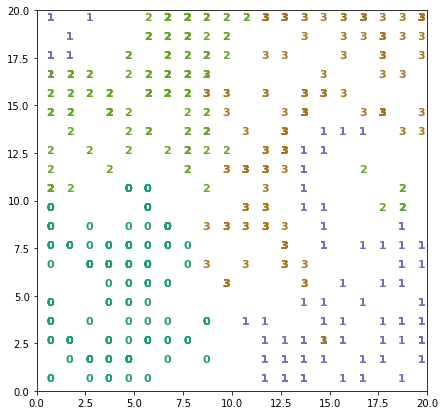

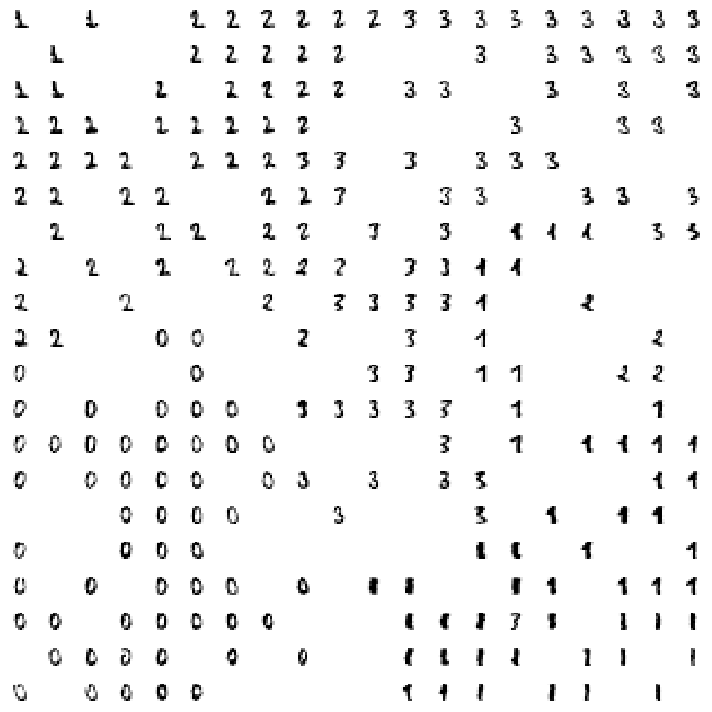

In [2]:
from sklearn import datasets
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# load the digits dataset from scikit-learn
# 901 samples,  about 180 samples per class
# the digits represented 0, 1, 2, 3, 4

digits = datasets.load_digits(n_class=4)
data = digits.data  # matrix where each row is a vector that represent a digit.
num = digits.target  # num[i] is the digit represented by data[i]

som = MiniSom(20, 20, 64, sigma=1.5, learning_rate=0.5)
print("Training...")
som.train_random(data, 1500)  # random training
print("\n...ready!")


plt.figure(figsize=(7, 7))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.Dark2(t / 4.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])


plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.show()